# Configurations

In [ ]:
import sys
sys.path.append('..')
import os
import itertools
import numpy as np
import seaborn as sns
import matplotlib as mpl
from sfp_nsdsyn import *

%load_ext autoreload
%autoreload 2

rc = {'text.color': 'black',
      'axes.labelcolor': 'black',
      'xtick.color': 'black',
      'ytick.color': 'black',
      'axes.edgecolor': 'black',
      'font.family': 'Helvetica',
      'axes.linewidth': 1,
      'axes.labelpad': 6,
      'xtick.major.pad': 10,
      'xtick.major.width': 1,
      'ytick.major.width': 1,
      'lines.linewidth': 1,
      'font.size': 12,
      'axes.titlesize': 12,
      'axes.labelsize': 12,
      'xtick.labelsize': 12,
      'ytick.labelsize': 12,
      'legend.title_fontsize': 11,
      'legend.fontsize': 11,
      'figure.titlesize': 12,
      'figure.dpi': 72 * 3,
      'savefig.dpi': 72 * 4
      }
mpl.rcParams.update(rc)

In [2]:
output_dir = '/Volumes/server/Projects/sfp_nsd/derivatives'
fig_dir = os.path.join(output_dir, 'figures', 'sfp_model', 'results_1D')
roi_list = ['V1', 'V2', 'V3']
lr = 0.005
max_epoch = 8000

In [5]:
voxels = 'pRFcenter'
subj = 'subj08'
# eccentricity bin information
e1, e2 = 0.5, 4
enum = 7
bin_list, bin_labels = tuning.get_bin_labels(e1, e2, enum=enum)

a = [3, 2, 0]
roi_pal = [sns.color_palette('dark', 10)[:][k] for k in a]
roi_pal.insert(0, (0.5, 0.5, 0.5))

# Load data

In [21]:
# NSD data
f = []
for roi in roi_list:
    f.append(os.path.join(output_dir, 'dataframes', 'nsdsyn', 'model',
                          f'dset-nsdsyn_sub-{subj}_roi-{roi}_vs-{voxels}_tavg-False.csv'))
nsd_subj_df = utils.load_dataframes(f)
nsd_subj_df = nsd_subj_df.query('names != "mixtures"')
nsd_subj_df['ecc_bin'] = tuning.bin_ecc(nsd_subj_df['eccentricity'], bin_list=bin_list, bin_labels=bin_labels)
nsd_subj_df= tuning.summary_stat_for_ecc_bin(nsd_subj_df,
                                       to_group= ['sub', 'ecc_bin', 'freq_lvl', 'names', 'vroinames', 'task', 'phase_idx'],
                                       to_bin=['betas', 'local_sf'],
                                       central_tendency='mean')

# NSD fitting results
args = ['sub', 'class', 'lr', 'eph', 'roi', 'e1', 'e2', 'nbin', 'curbin']
pt_file_list = []
for roi, curbin, stim_class in itertools.product(roi_list, range(enum), ['avg']):
    stim_class = stim_class.replace(' ', '-')
    file_name = f'model-params_class-{stim_class}_lr-{lr}_eph-{max_epoch}_e1-{e1}_e2-{e2}_nbin-{enum}_curbin-{curbin}_sub-{subj}_roi-{roi}_vs-{voxels}.pt'
    pt_file_list.append(os.path.join(output_dir, 'sfp_model', 'results_1D', 'nsdsyn', file_name))
nsd_tuning_df = tuning.load_all_models(pt_file_list, *args)

# Plot one example subject's tuning curves for NSD V1, V2, V3 (subj08)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


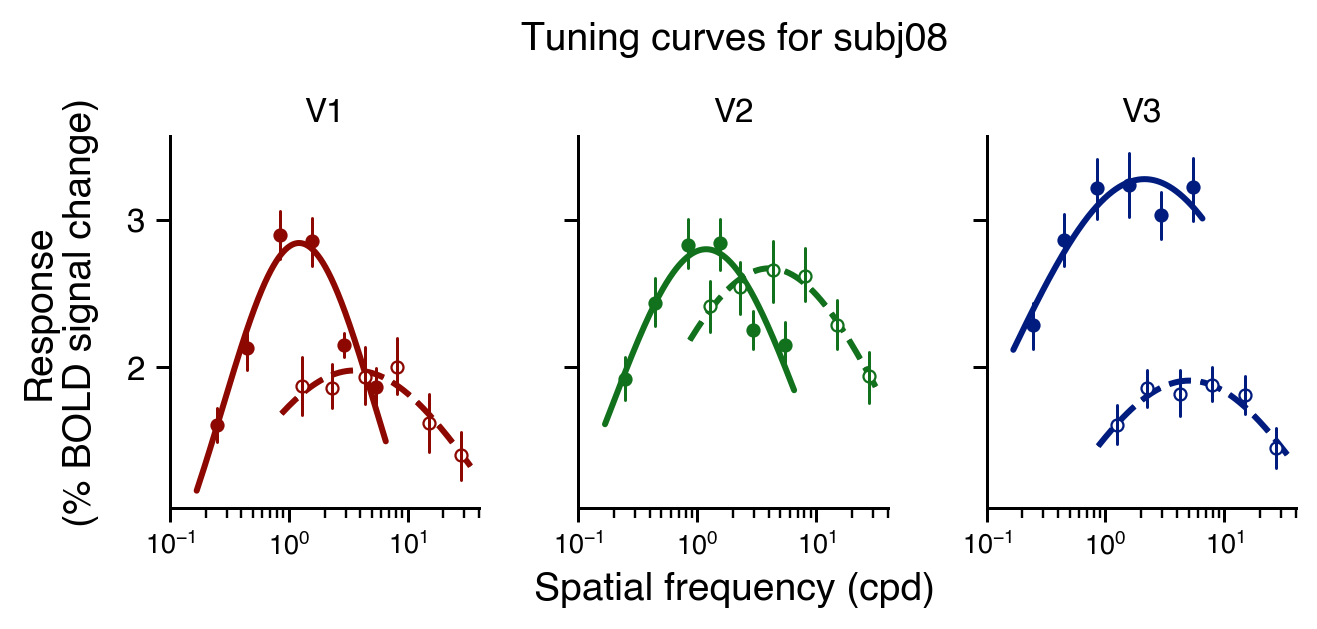

In [48]:
bins_to_plot = [bin_labels[k] for k in [0,6]]
fig, axes = vis1D.plot_tuning_curves_NSD_with_errorbar(nsd_subj_df, 
                                                       nsd_tuning_df, 
                                                       y='betas', 
                             bins_to_plot=bins_to_plot, 
                             pal=roi_pal[1:], 
                             normalize=False,
                             errorbar=True,
                             title='Tuning curves for subj08',
                             save_path=None)